In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, roc_curve
from sklearn.preprocessing import StandardScaler,LabelEncoder,RobustScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier

In [2]:
df=pd.read_csv('MIGRAINE.csv')
df.head()

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [3]:
df.shape

(400, 24)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,31.7050,12.139043,15.0,22.0,28.0,40.0,77.0
Duration,400.0,1.6100,0.770964,1.0,1.0,1.0,2.0,3.0
Frequency,400.0,2.3650,1.675947,1.0,1.0,2.0,4.0,8.0
Location,400.0,0.9725,0.268186,0.0,1.0,1.0,1.0,2.0
Character,400.0,0.9775,0.277825,0.0,1.0,1.0,1.0,2.0
Intensity,400.0,2.4700,0.768490,0.0,2.0,3.0,3.0,3.0
Nausea,400.0,0.9875,0.111242,0.0,1.0,1.0,1.0,1.0
Vomit,400.0,0.3225,0.468019,0.0,0.0,0.0,1.0,1.0
Phonophobia,400.0,0.9775,0.148489,0.0,1.0,1.0,1.0,1.0
Photophobia,400.0,0.9800,0.140175,0.0,1.0,1.0,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [6]:
df.isnull().mean()*100

Age            0.0
Duration       0.0
Frequency      0.0
Location       0.0
Character      0.0
Intensity      0.0
Nausea         0.0
Vomit          0.0
Phonophobia    0.0
Photophobia    0.0
Visual         0.0
Sensory        0.0
Dysphasia      0.0
Dysarthria     0.0
Vertigo        0.0
Tinnitus       0.0
Hypoacusis     0.0
Diplopia       0.0
Defect         0.0
Ataxia         0.0
Conscience     0.0
Paresthesia    0.0
DPF            0.0
Type           0.0
dtype: float64

In [7]:
df.duplicated().sum()

6

In [8]:
df.drop_duplicates(inplace=True)

#### converting object data to numeric

#### Perfoming some EDA

In [9]:
le=LabelEncoder()
df['Type']=le.fit_transform(df['Type'])

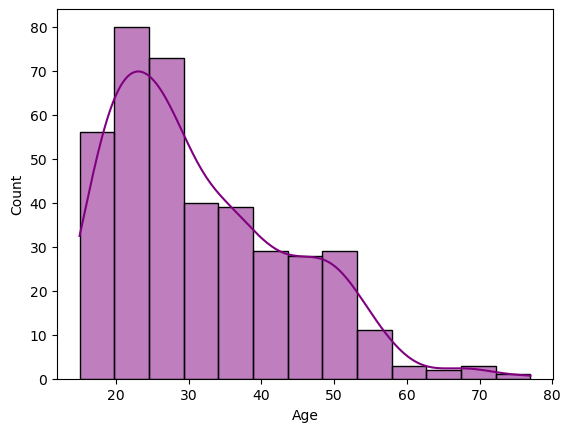

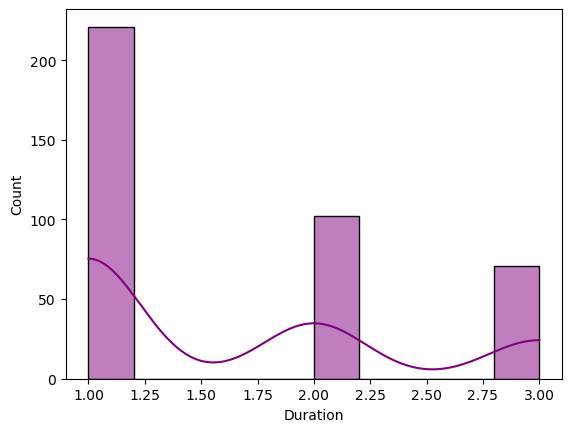

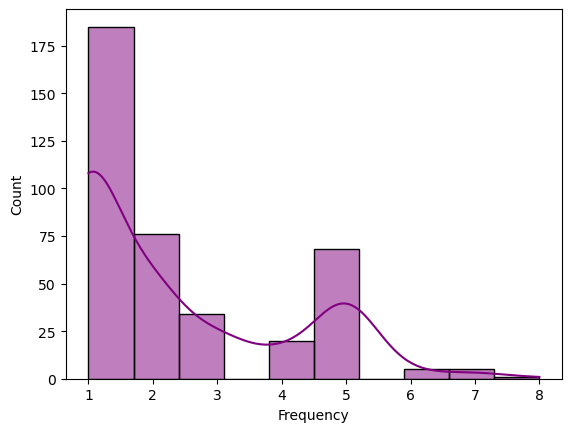

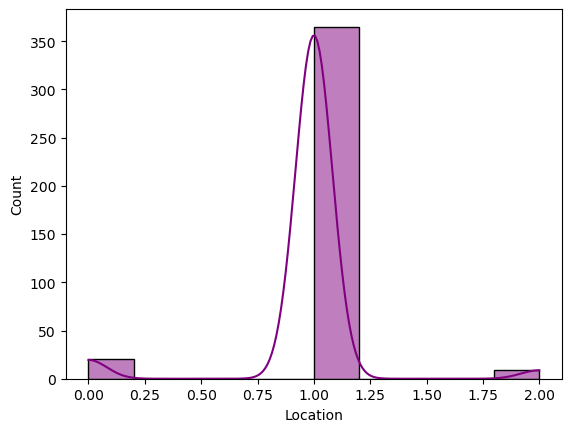

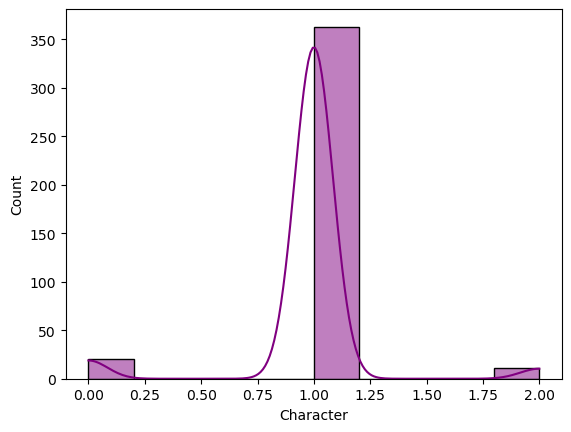

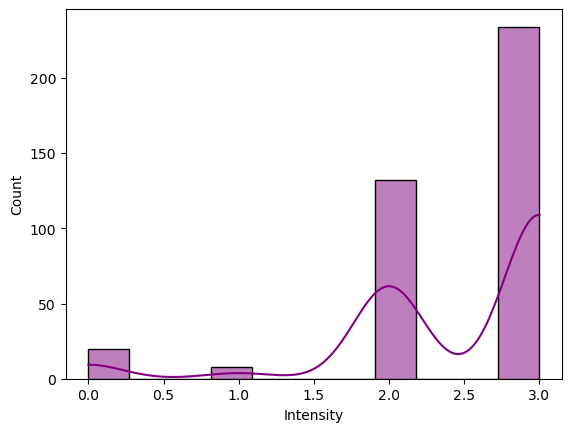

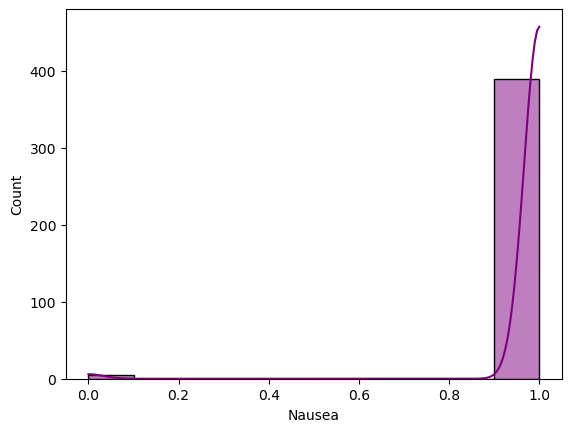

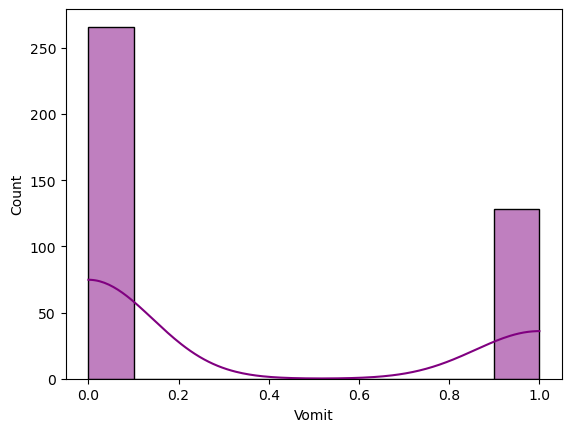

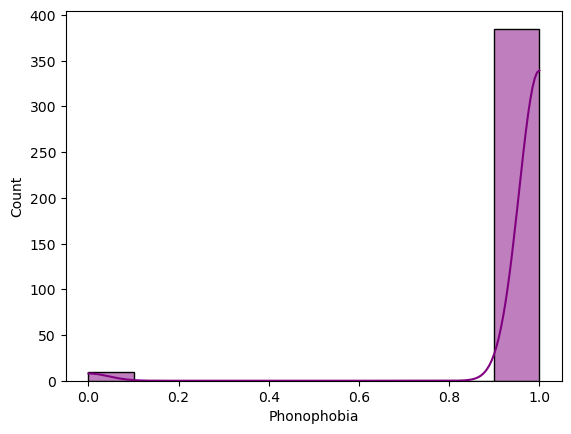

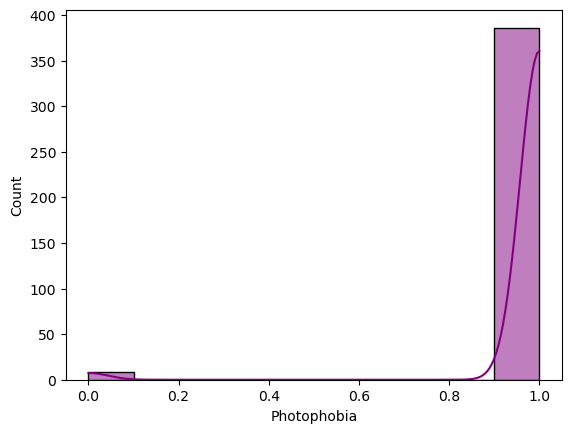

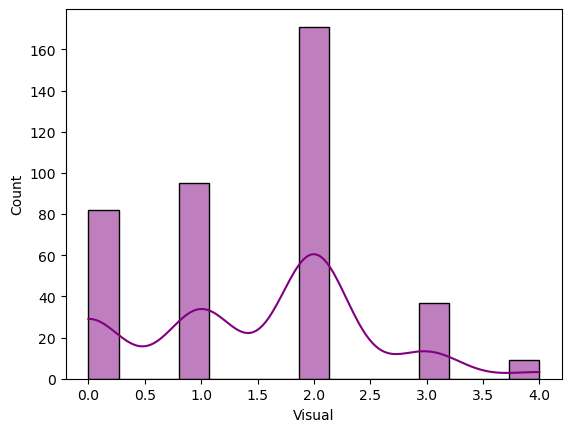

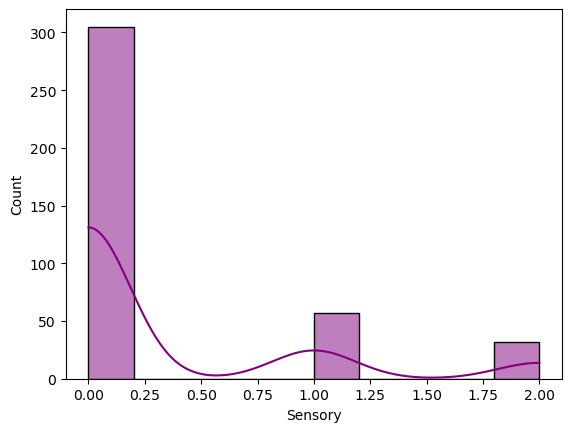

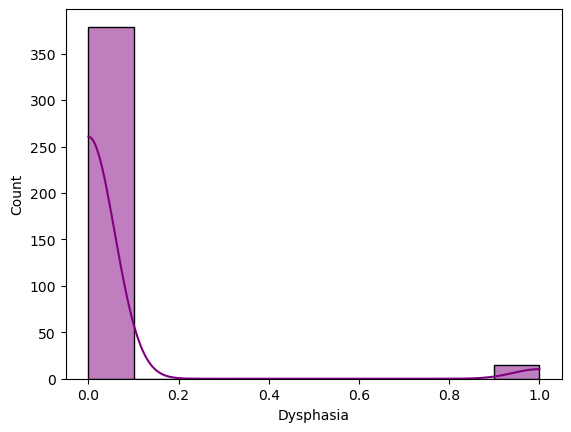

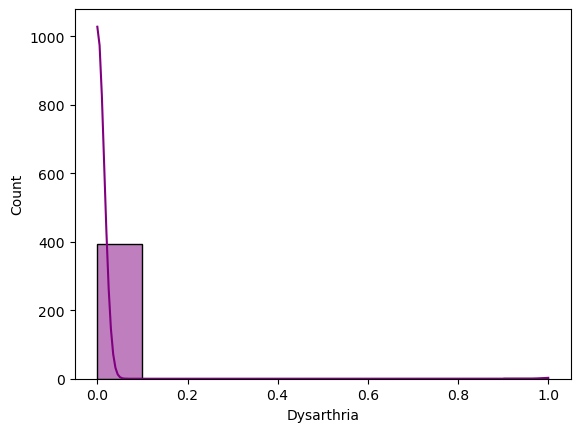

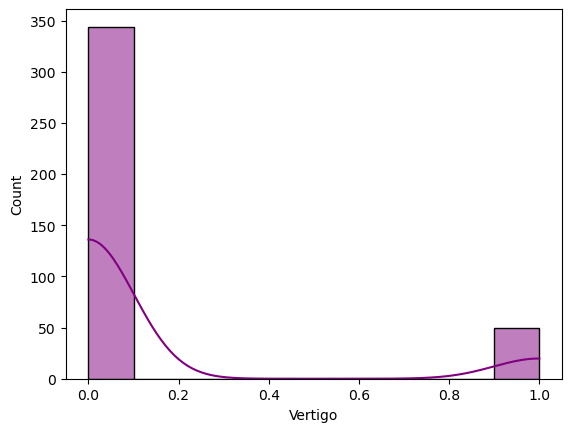

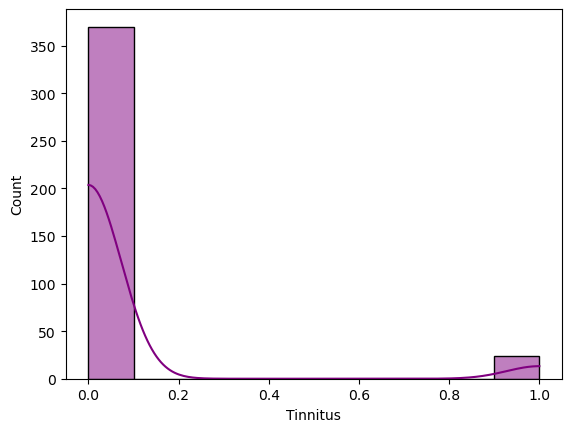

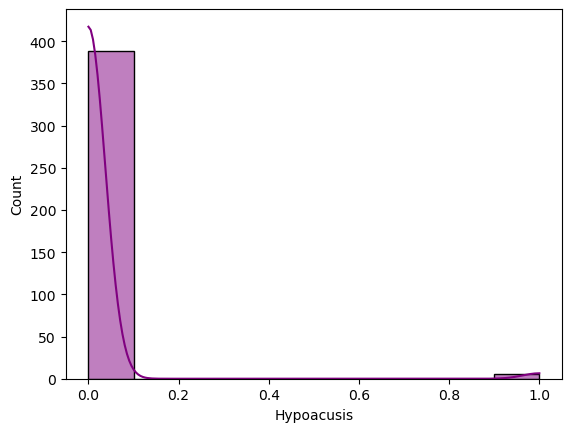

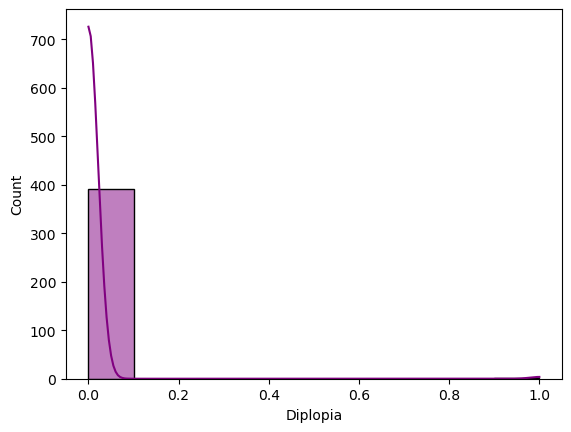

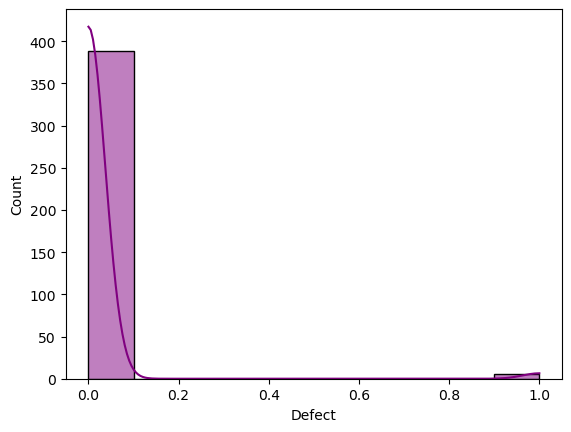

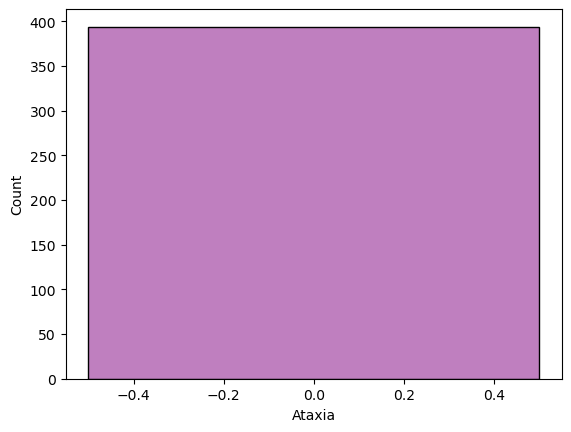

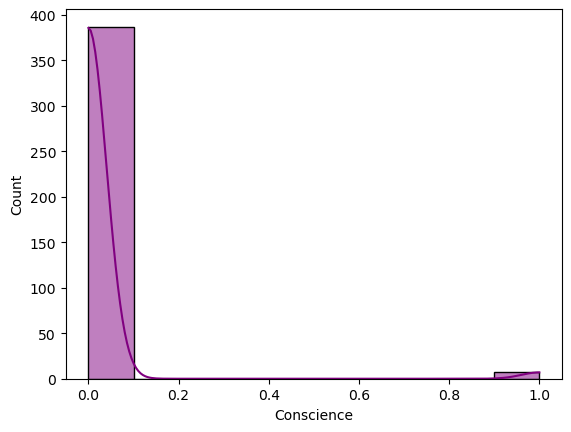

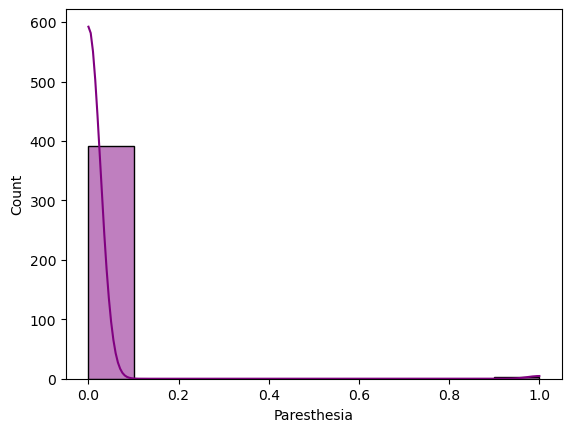

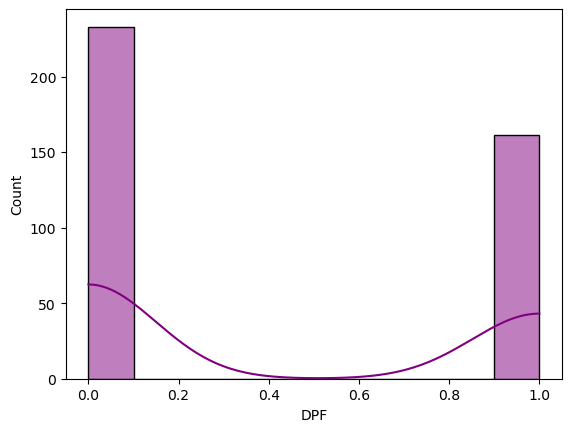

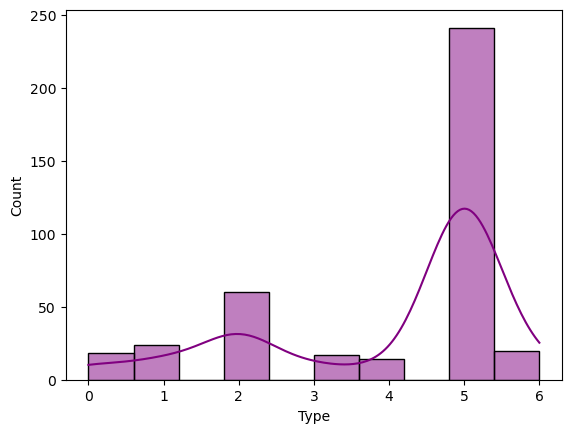

In [10]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i],kde=True,color='purple')
        plt.show()

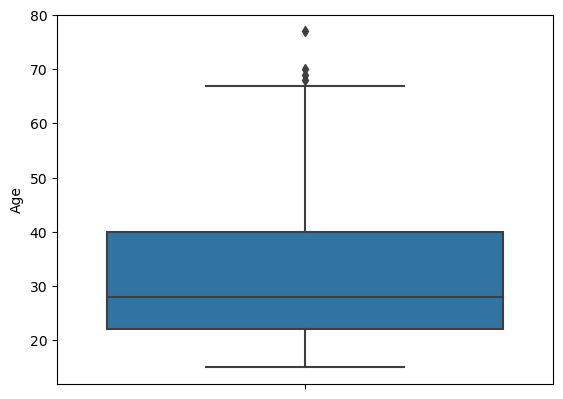

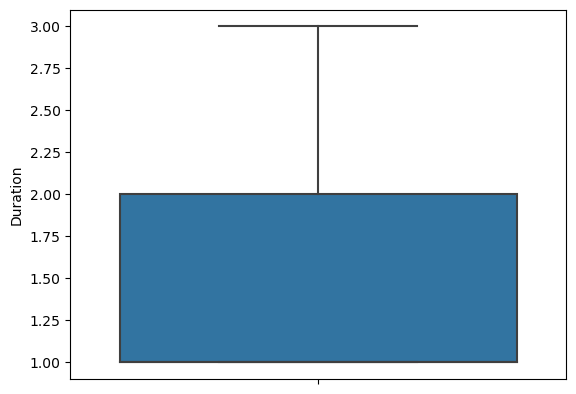

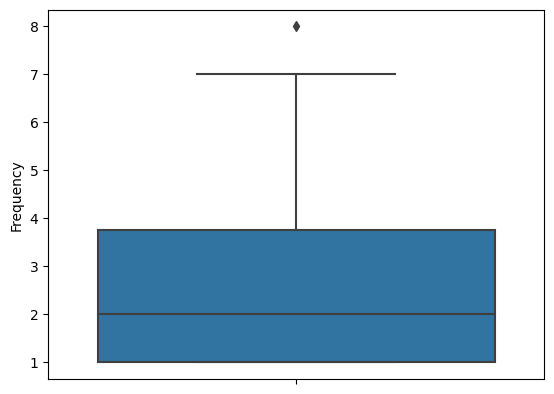

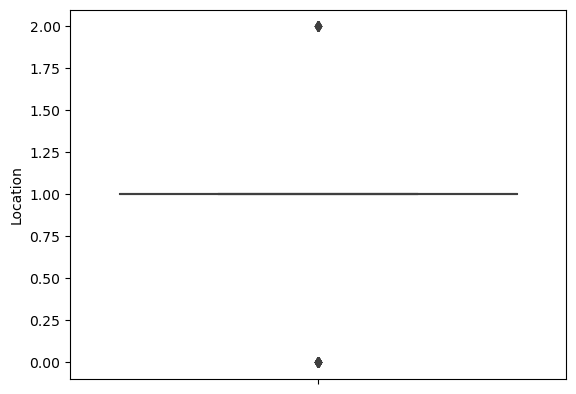

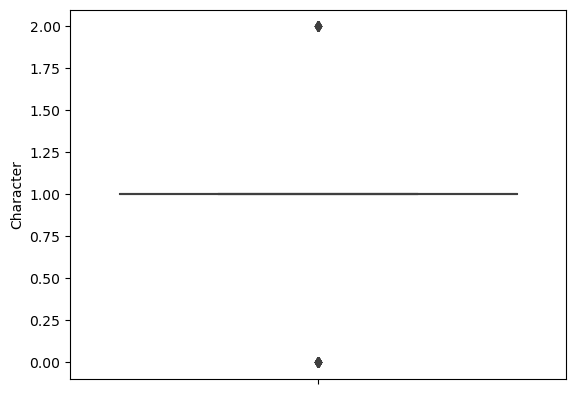

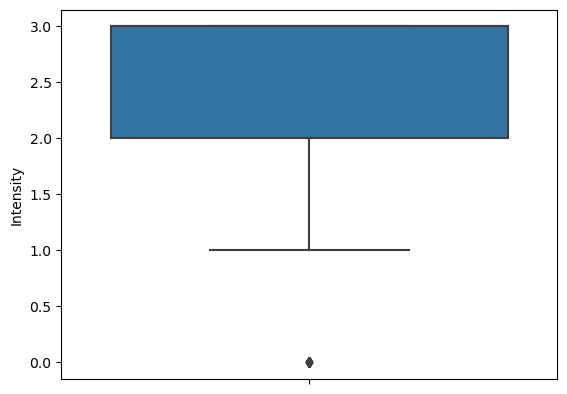

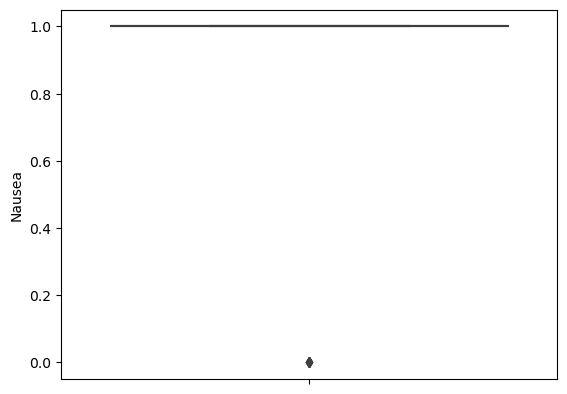

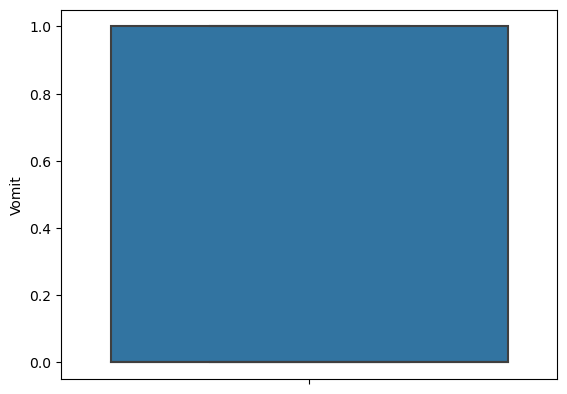

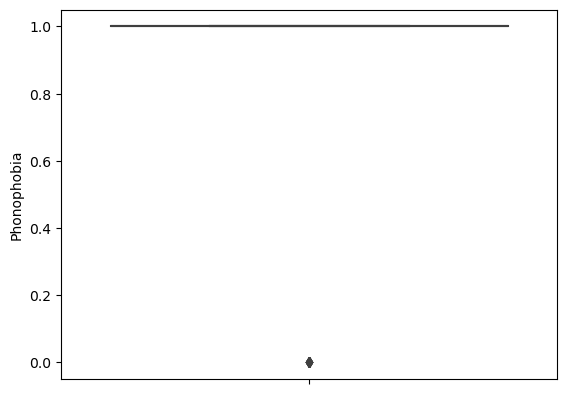

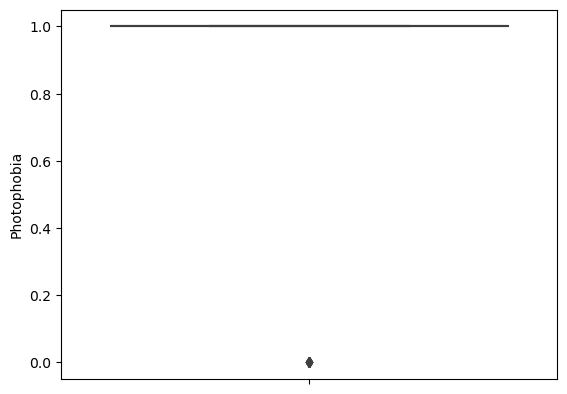

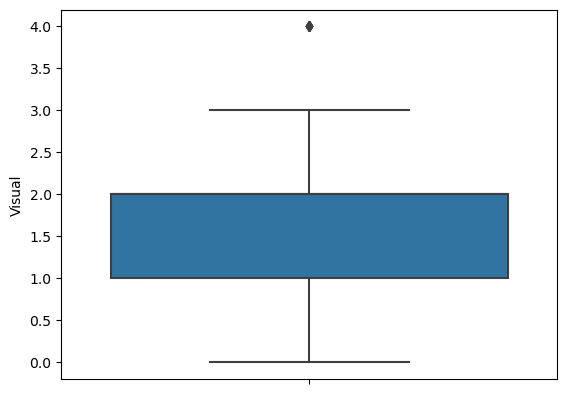

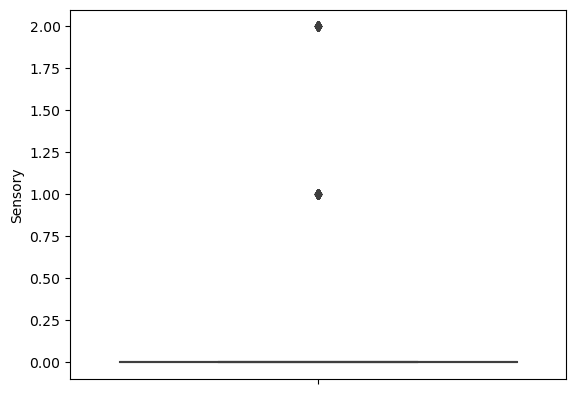

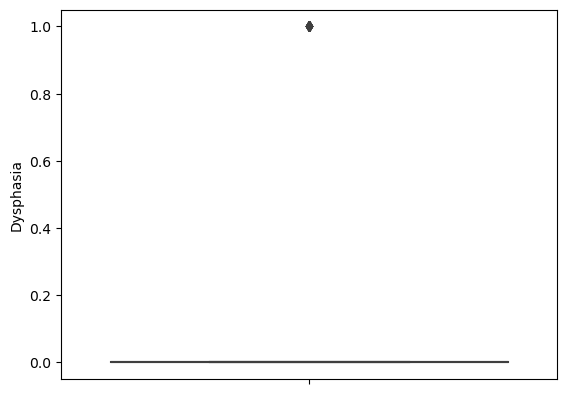

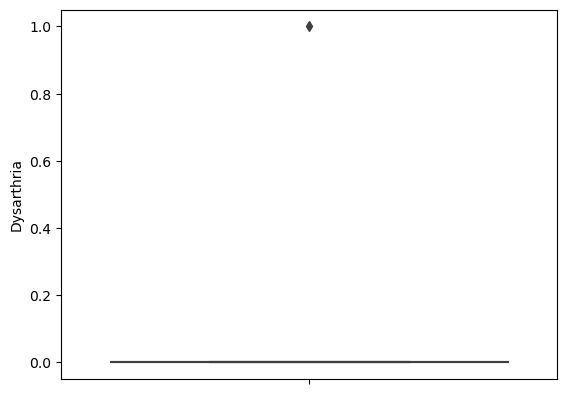

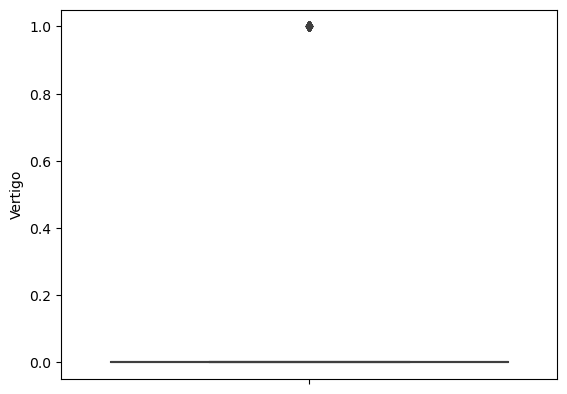

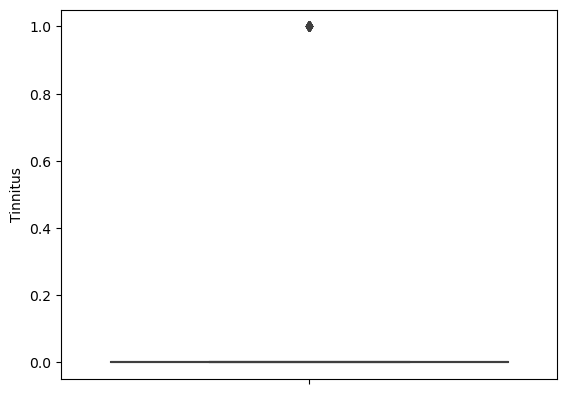

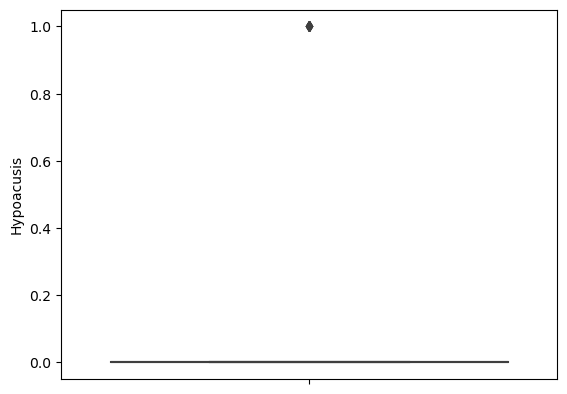

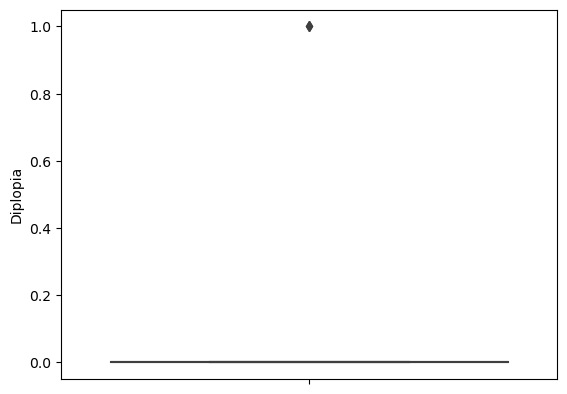

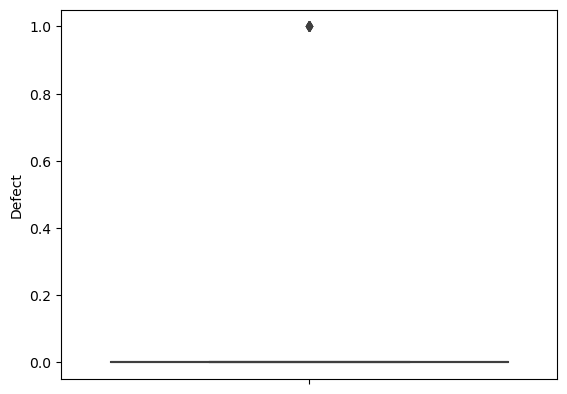

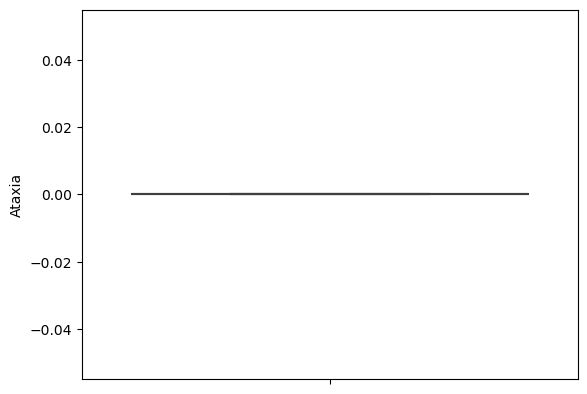

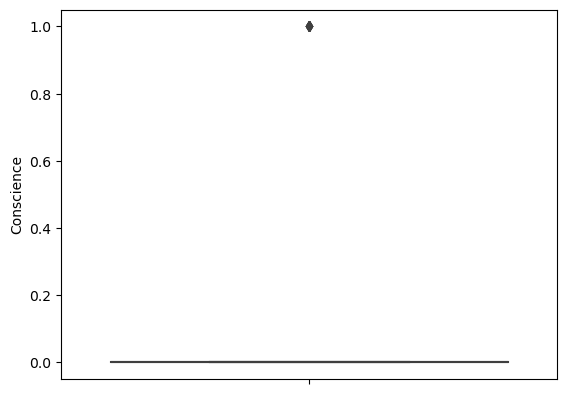

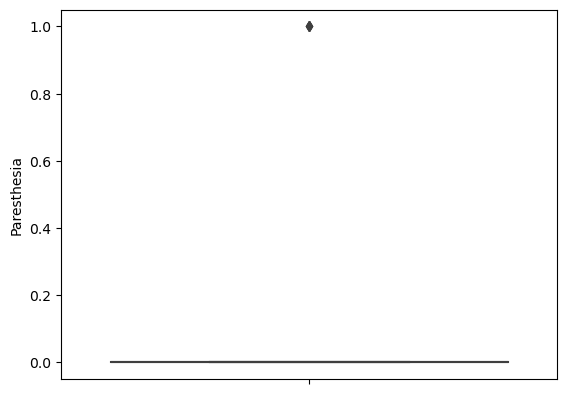

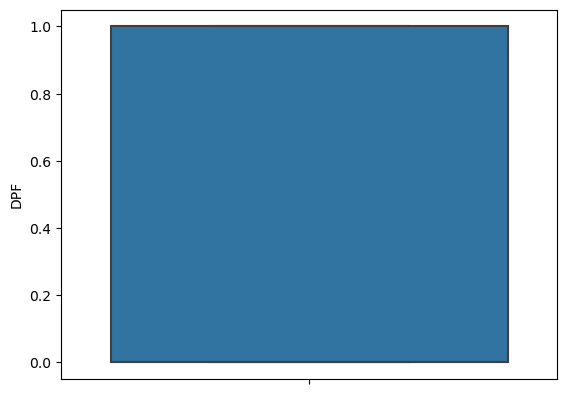

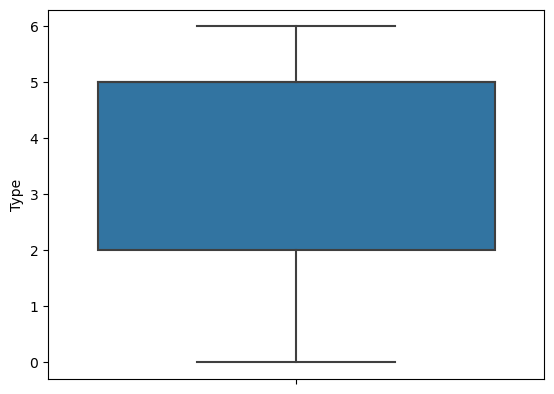

In [11]:
for column in df.columns:
    if df[column].dtype != "object":
        sns.boxplot(y = df[column])
        plt.show()

In [12]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [13]:
for i in df.columns:
    if df[i].dtypes !='object':
        UL,LL=outlier_limit(df[i])
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

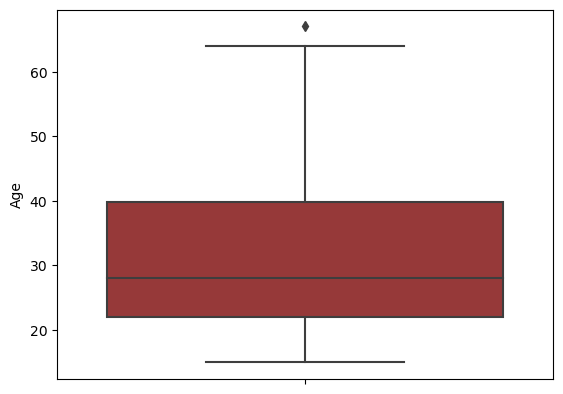

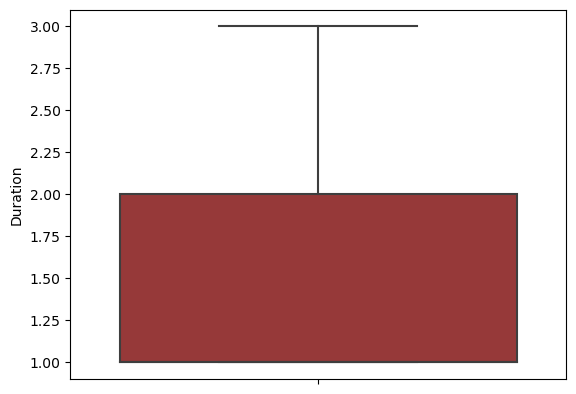

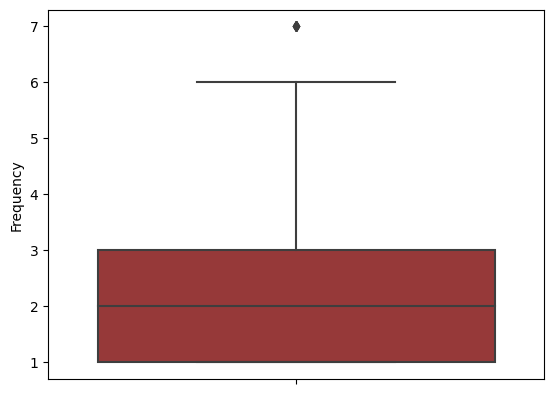

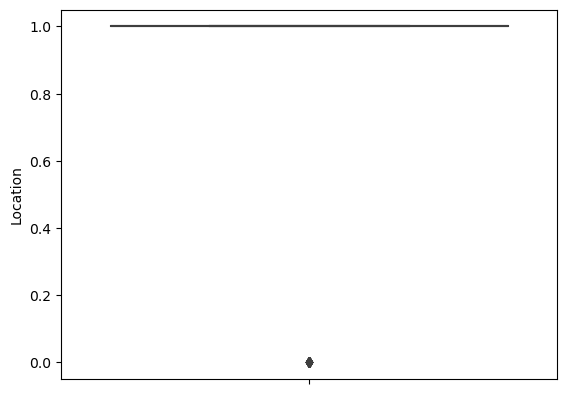

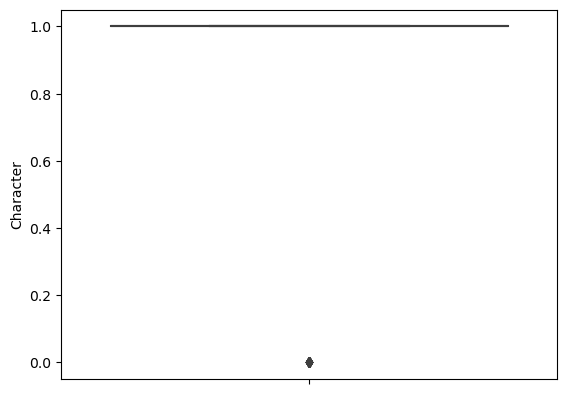

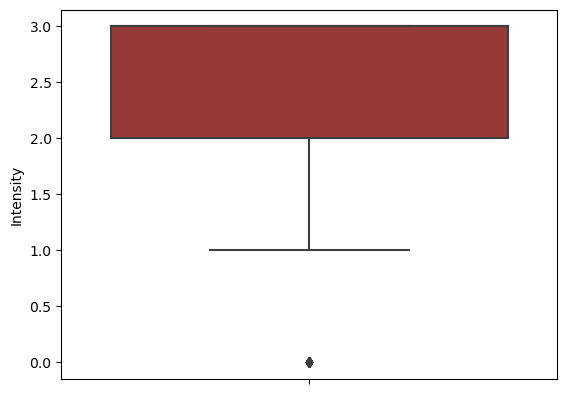

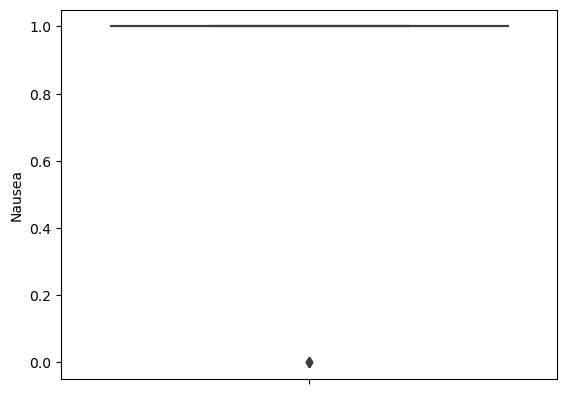

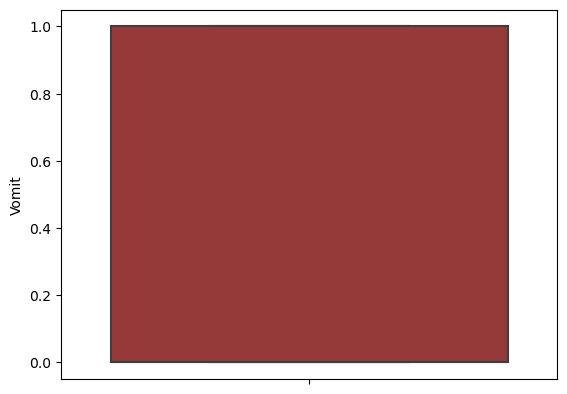

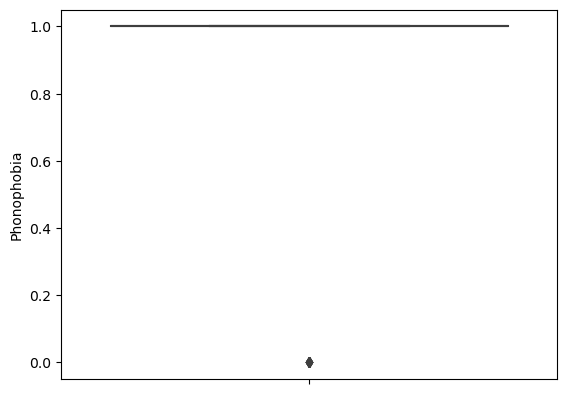

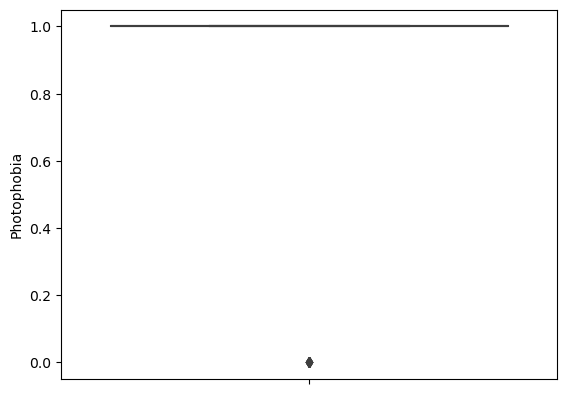

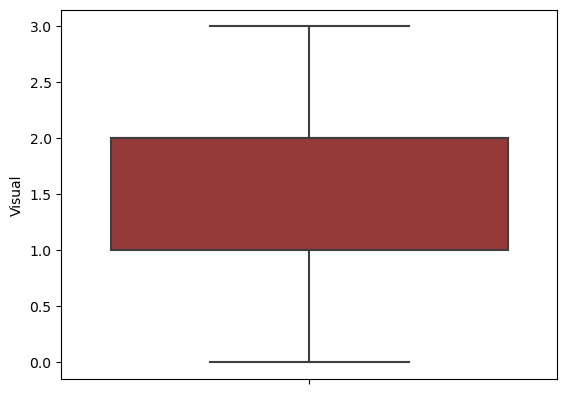

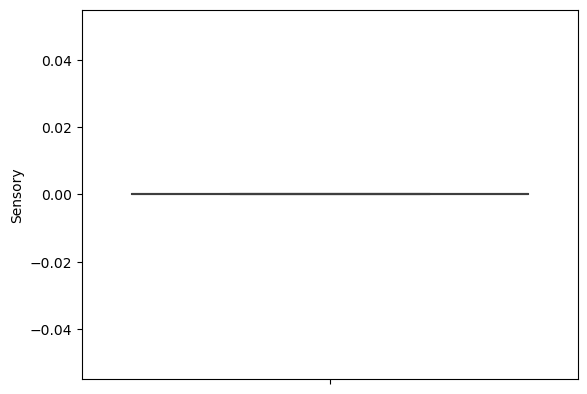

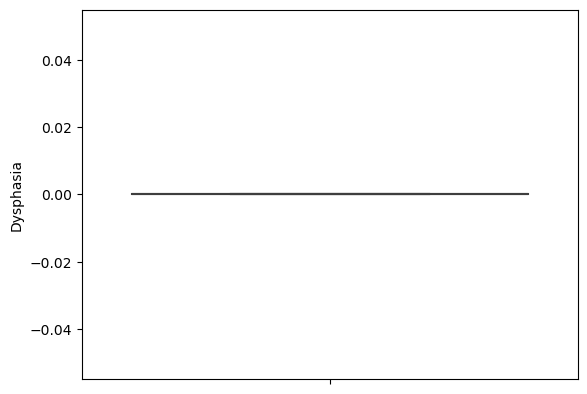

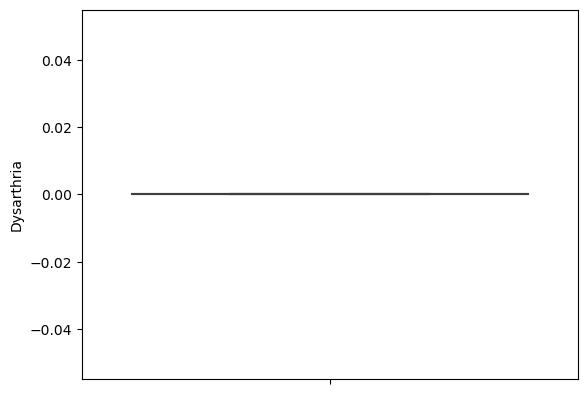

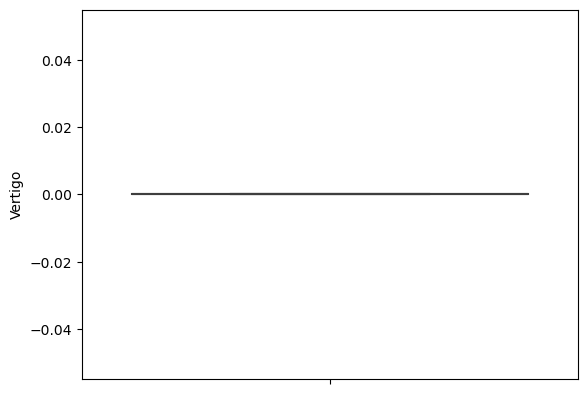

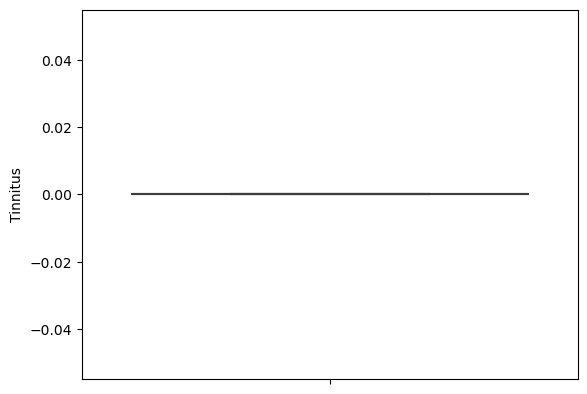

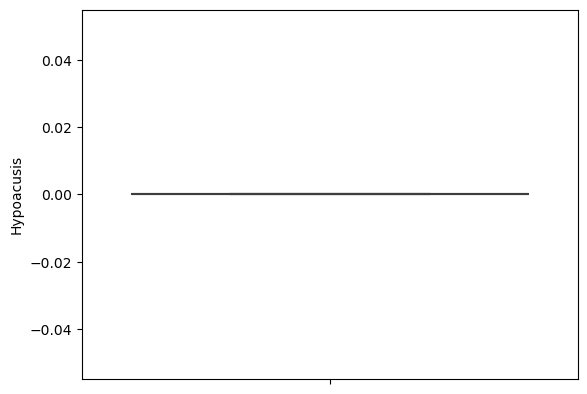

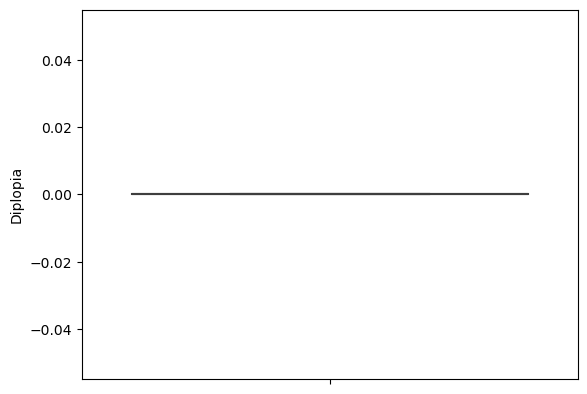

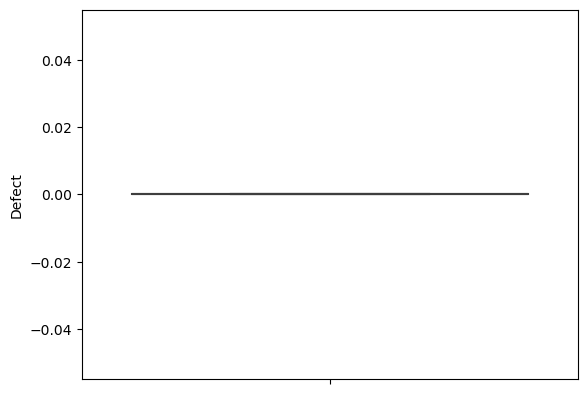

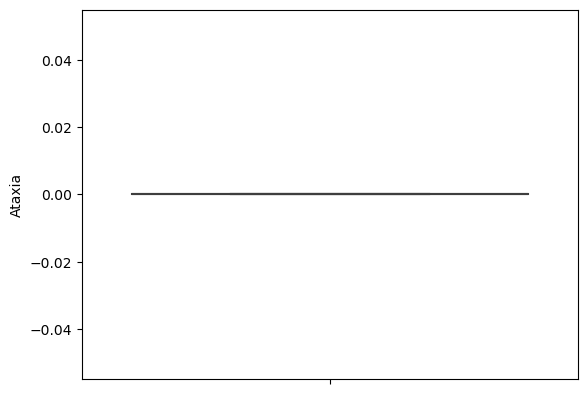

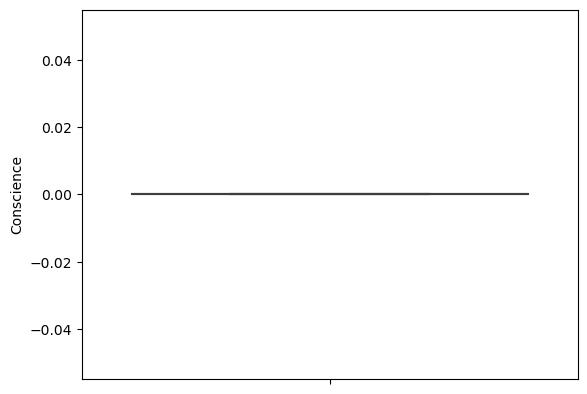

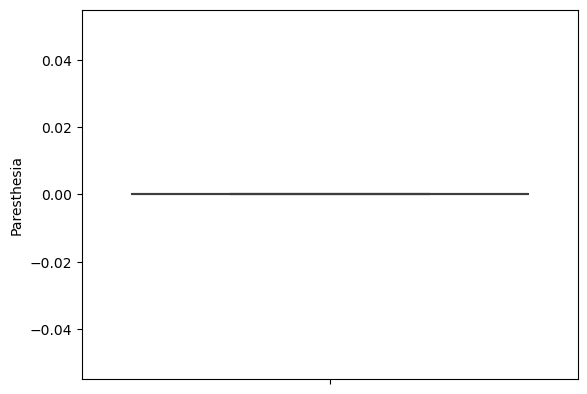

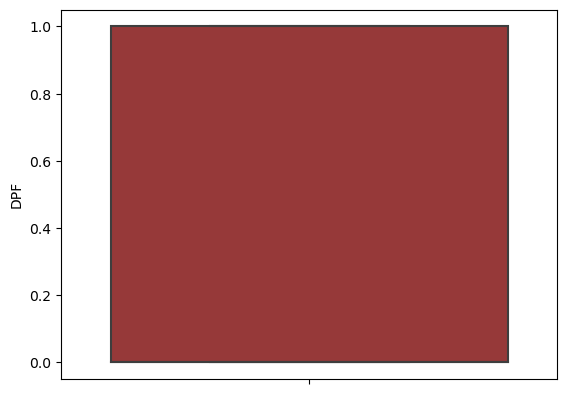

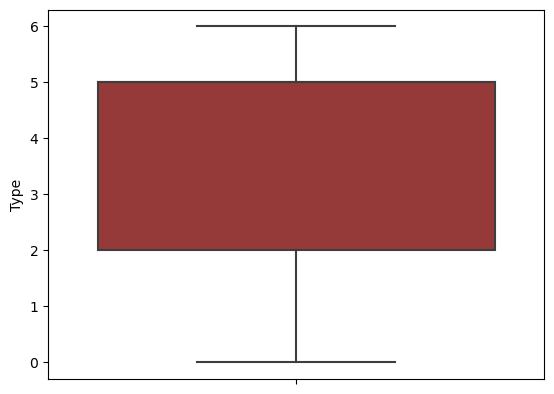

In [14]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i], color='brown')
        plt.show()

In [15]:
df.isnull().mean()*100

Age             1.015228
Duration        0.000000
Frequency       0.253807
Location        2.284264
Character       2.791878
Intensity       0.000000
Nausea          0.000000
Vomit           0.000000
Phonophobia     0.000000
Photophobia     0.000000
Visual          2.284264
Sensory        22.588832
Dysphasia       3.807107
Dysarthria      0.253807
Vertigo        12.690355
Tinnitus        6.091371
Hypoacusis      1.522843
Diplopia        0.507614
Defect          1.522843
Ataxia          0.000000
Conscience      1.776650
Paresthesia     0.761421
DPF             0.000000
Type            0.000000
dtype: float64

In [16]:
df.dropna(inplace=True)

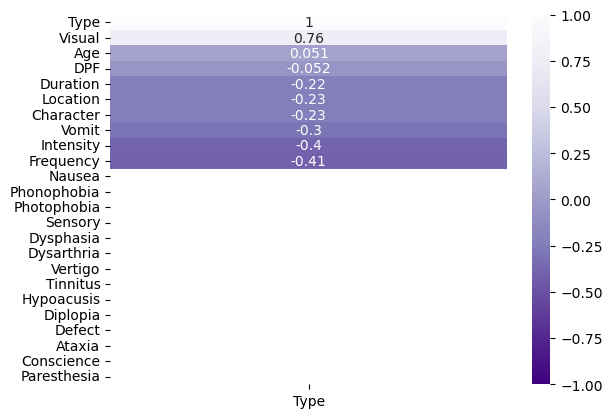

In [17]:
sns.heatmap(df.corr()[["Type"]].sort_values(by="Type", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Purples_r");

In [18]:
df.corr()[["Type"]].sort_values(by="Type", ascending=False)

,Type
Type,1.000000
Visual,0.757384
Age,0.051415
DPF,-0.051528
Duration,-0.219278
Location,-0.231040
Character,-0.231040
Vomit,-0.298305
Intensity,-0.395520
Frequency,-0.407722


In [19]:
x=df[['Visual','Age']].values
y=df[['Type']].values

In [20]:
sc=StandardScaler()
x= sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

#### Crossvalidation

In [21]:
models = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

In [22]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="accuracy",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    print("Mean Score: ",np.mean(scores))
    print("*"*100)

cross validation model : LogisticRegression
Mean Score:  0.9279999999999999
****************************************************************************************************
cross validation model : DecisionTreeClassifier
Mean Score:  0.884
****************************************************************************************************
cross validation model : GradientBoostingClassifier
Mean Score:  0.892
****************************************************************************************************
cross validation model : RandomForestClassifier
Mean Score:  0.8960000000000001
****************************************************************************************************


In [23]:
model = LogisticRegression()

In [24]:
model.fit(x_train, y_train)
print("model trained with {}".format(model))
score_train =accuracy_score (y_train, model.predict(x_train))
score_tst = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))
print("Model accuracy on train is:: ",score_train)
print("Model accuracy on test is:: ", score_tst)
print("confusion_matrix train is:: ", con_train)
print("confusion_matrix test is:: ", con_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))
print("*"*60)

model trained with LogisticRegression()
Model accuracy on train is::  0.915
Model accuracy on test is::  0.98
confusion_matrix train is::  [[  0   0   0   0   7   0]
 [  0  49   0   0   0   0]
 [  0   1   0   0   0   0]
 [  0   0   0   0   1   0]
 [  0   0   0   0 134   0]
 [  0   0   0   0   8   0]]
confusion_matrix test is::  [[ 0  0  1]
 [ 0  8  0]
 [ 0  0 41]]
Wrong Predictions made: 714 / 2500
************************************************************


In [25]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)

In [26]:
OUTPUT

,ACTUAL,PREDICTION
0,5,5
1,2,2
2,5,5
3,5,5
4,5,5
...,...,...
245,6,5
246,6,5
247,6,5
248,6,5
